# GauchoGrade- Deep Learning for Steely Dan and Soft Rock Ratings
### Nick Pittman

### Foreword
For a more professional-oriented application of machine learning, please see my subsequent project applying ML methods to Alzheimer's disease transcriptomics data, found on my GitHub at www.github.com/barinikis-arch.

This personal project is my first methodological practice in the use of various methods of data science, machine learning, and deep learning/neural networks.

I decided that a good place to start was in something with easily-accessible data, and settled on predicting song ratings from music data available through Spotify. A similar project is given as piecemeal practice throughout online courses such as Kaggle's ML tutorials, but I wanted to build a maximally-involved project in that theme, assembling everything I had learned to take raw data all the way to a finished model, deploying tools from basic data cleaning and formatting all the way to pipelining and more advanced neural network design choices.

This project was initially given its genesis by my friends, many of whom (including myself) are musicians with a love of soft rock and jazz-rock fusion. As such, in addition to the more serious aspects of the project, one will notice some less-professionally-oriented comments, such as the insistent use of continuously-differentiable activation functions purely because they are "smooth", in the spirit of the "smooth" music that defines Yacht rock.

Additionally, I included basic conceptual overviews of what I had learned throughout my ML courses, meant for my friends and family to have a rough idea of what was going on (many are computer programmers), and also to solidify my own understanding. My familiarity with them has grown since then, but I have for the most part left the initial comments in.

## Conceptual Overview
In the cult-fanbase world of soft rock and jazz-rock fusion, there exists a scale rating songs by how "smooth" they are: the Yachtski scale. This metric was established and applied over the course of the "Yacht or Nyacht" podcast, on which a group of four hairy-chested, seafaring podcasters gave classic songs a rating, evaluating how "Yacht or Nyacht" each was. To each song they assigned a score from 0 to 100, with 100 representing the "perfect" Yacht rock song, the musical creation by which all other songs' smoothnesses are measured: "What a Fool Believes," by the Doobie Brothers.

This project will use various methods of machine learning and deep learning to see if, given only a song's sound data (found on Spotify's song data banks), a computer can predict what score a song will receive on the Yachtski scale.

The data on Spotify is quite large, coming in at over 100,000 songs. For each song, it includes descriptors like danceability, loudness, energy, instrumental-ness, and tempo.

Unfortunately, these parameters are pretty vague, so it's hard to imagine that given only this information one could tell much about a song at all, let alone how Yacht rock-y it is. This means that any truly predictive models will need more data that better describe the "Yacht"-ness of a song: chords and chord structures, melodica solos, number of session musicans utilized, and proportion of the song lyrics that constitute wistful recollection of past romantic flames. Unfortunately, this data is not readily available online, meaning it must be manually determined for a large training set and appended to the existing data table.

Nonetheless, we will proceed with the training on the limited data available, with the understanding that our model will be extremely easy to expand if an additional column(s) of descriptive features become available.

To train the model, we will use the couple hundred songs with an established Yacht rating. As an extremely rough conceptual overview of what occurs when a neural network (or other machine learning model) is trained, the model will start with a "guess" formula that relates sound properties to Yacht score- for instance, let's say each song's data has three features: danceability, loudness, and musical complexity. The formula may start out as ```yacht_score = .3*danceability + .5* loudness + 1.8*musical_complexity```, with score capped at 100. The model will try this first guess on "Song A" within the data, and perhaps given the three features it predicts a Yacht score of 40. However the real Yacht score of this song was 85, meaning the model did a pretty poor job. The model will adjust its parameters: .3 to .1, etc., and try again, until it finds a set of numbers that leads to predictions that match the true scores reasonably well.  Once we have this final set of parameters, we can apply the model to songs for which there is no established Yacht score, and generate a prediction for what the Yacht score should be. If the model is good, this score will be pretty accurate of what a human podcaster might evaluate the song at.


#### Code Outline:
- Load data and reformat into tables
    - Some data is in good shape (spotify one), whereas other data needs to be re-grouped into tables from its ugly native form as a giagantic list (Yachtski website)
- Data inspection/planning:
    - Check out the data.head() to see quick peeks of the data's organization
    - Check for any columns or songs with null entries (we will need to either delete these or fill in their values, a process called imputation)
    - Check for columns with categorical data types (these will need to be replaced with numbers, even if they're simply just 1's for yes entries and 0's for no entries. This is called encoding.)
    - Consider if there is any potential for data leakage- meaning, things within the data that contain information about the Yacht score of a song, that are placed in the descriptive features of the song. If these were present, the model would immediately pick up on the fact that it can build a great equation for Yacht score using this, and not actually learn anything. When it came time to predict a real song for which this cheaty information was not available, it would struggle. Other related sorts of data leakage involve improper use of averaging on training vs. test data, but these are usually handled automatically with proper coding practices and "pipelining" (which makes sure averages in training data don't secretly contain averages of the supposed-to-be-hidden test data).

- Data pre-processing methods
    - Null entries: In my case, I will delete any songs with null entries since there are very few of them.
    - Categorical data: In my case, the only categorical data is the song artist. Various methods of encoding this numerically are possible, but unfortunately there are thousands of artists (called the "cardinality" of the column), and computational expense for high cardinality categorical data is pretty extreme. Given this, I will actually drop the artist column.
        - Other categorical data is not yet present, but ideally will be "ordinal encodable", meaning I can assign it a numerical scale with notion of ordering. For instance, "Amount of wistfulness: High, med, low" can be encoded simply as 3, 2, 1, respectively, so the model can use it in numerical equations immediately. Whether I have people scoring the songs do this, or have the computer do it, is equivalent.
    - Numerical data: In this case, I will simply scale it to lie on a 0-to-1 scale, which is the simplest and most common choice of scaling. Scaling values of training features to have a common scale helps the neural network train more stably, as no feature's coefficients need to be 1000 times bigger than another's.
- Split data into training and test sets, and separate the score of each song from the features
    - This is done mostly automatically by built-in methods
- Network/Model Choice- I will try multiple
    - Neural network (deep learning): Models of this kind have multiple layers/steps of numerical operations, composed one after another, allowing for the detection of very complex patterns.
        - Layering/architecture choices: how many layers do we want, and how many nodes in each layer. Also, what is our final layer output, which in this case is a simple linear unit since we want a numerical output.
        - Inter-layer functions: called "activation" functions, these transform data at intermediate steps to allow more complex data not treatable simply by layer-after-layer models to be fit
        - Other data transformation:
            - Dropout rate: randomly drops nodes to prevent networks from detecting false trends
            - Batch normalization: helps network stability by scaling outputs at intermediate steps (doesn't affect accuracy as much)
        - Loss function: Determines how the model's performance is evaluated when comparing to the training data. We will use mean absolute error, i.e. the size of the difference between predicted and true values of Yacht score. I will also use this as the primary visual metric of performance, although the two don't have to be the same.
        - Optimizer: determines how the parameters in the model are adjusted to get to the best-fitting model fastest. The "ADAM" optimizer, which is built-in, is a pretty good all-around choice.
        - Training time and minibatching data: rather than training on the whole set at once, minibatching takes subsets of the data, trains on them, and then improves on subsequent batches. This allows you to "manufacture" many smaller, uncorrelated data sets from a limited-size dataset. One can determine how big each little subset of data should be, and then for how many cycles over the whole dataset the training should occur.
        - Callbacks: These are like "checkpoints" that are run every couple of steps to see how the model is doing and tweak the initial hyperparameters (the things we want to change about the model, like the learning rate at which the network evolves; as opposed to the parameters, which are the weights within the model themselves that actually try and describe the data), such as the learning rate of how the parameters are adjusted, and stopping the model if it has reached near a place of best performance (which avoids over-training).
    - Random forest: A more simple network based on averaging over many simple decision trees
        - I elected to not train a random forest on this data, but in principle it would be easy to do so on the properly-cleaned data.

- Compiling the model/pipelining: using built-in features, many of the above functions can be declared, and the computer will run them automatically at each step in a way that avoids accidentally telling the model about the target feature (the score). The above stages will be done in separate lines of code, and then combined into a "Pipeline", which the computer knows how to interpret.



#### Potential Future Upgrades:
Obviously, the model is unlikely to be perfect, things will need to be adjusted, and future upgrades can help it perform better, accuracy and speed-wise. Mainly, it would be desirable to have the training use my computer's GPU for parallel training (of many minibatches at once). This would involve cacheing and pre-fetching data using my CPU, so by the time the GPU is done training, the CPU has already processed and readied the next couple minibatches of data. This reduces GPU wait time.

# Code

In [4]:
###Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading data and reformatting it into labelled tables


In [5]:
###Import data files
os.chdir("/content/drive/MyDrive/GauchoGrade/")

spotify_data_raw = pd.read_csv("SpotifyAudioFeaturesApril2019.csv")
spotify_data_raw.index = spotify_data_raw["track_name"]

##Basic cleaning up of the data- adding the Yacht score column, dropping useless descriptors, and dropping songs with missing data
spotify_data_raw["Yacht Score"] = [0 for i in range(0,spotify_data_raw.shape[0])]
spotify_data_raw.dropna(inplace=True) #Drops songs with any missing data (there was only one song with a missing name)
spotify_data_raw.drop(["track_id","key","mode"],axis=1,errors="ignore",inplace=True)  #Drop the track id and other useless descriptors


yacht_scale_raw = pd.read_csv("Yacht_Scale_Data.csv", header=None, index_col=False)  #Column containing the yacht scale data
###Reshaping the yacht scale data, which is currently a very long list
yacht_scale_data = pd.DataFrame(np.reshape(yacht_scale_raw,(-1,8)))  #Formats the data into the same table format that was on the website
yacht_scale_data=yacht_scale_data.iloc[:, 0:2]  #Deletes unneeded columns (year published, etc.)
yacht_scale_data.columns=['Average Yacht Score',"Artist and Song Name"] #Names the columns
# print("Data shape:", yacht_scale_data.shape)
# yacht_scale_data.head()

## Append Yachtski Scores to the Spotify Database

In [6]:
# display(spotify_data.head())

###Define a function that takes the raw yacht data, and splits its combined artist - songname into two new columns, plus one that indicates if there are extra hyphens
# that would necessitate a by-hand matching process.
def split_artist_and_song_name(inputrow):
    '''
    Takes in an input row, and accessess the artist-songname, and splits it at the dash separating artist and song name.
    However, we may encounter some artists with hyphenated names.
    If the length of the split string is greater than 2, we should return a flag so we can manually edit the data.
    '''
    inputstring = inputrow.loc["Artist and Song Name"]
    inputstring = inputstring.strip() #Removes extra spaces
    split_string = inputstring.split("-") #Splits at the dash
    split_string = [substring.strip() for substring in split_string] #Strips spaces off the produced strings
    if len(split_string)>2:  #Return manual matching if string ended up split into more than 2 parts
        manual_matching_needed = True
    else: manual_matching_needed = False

    return pd.Series([split_string[0], split_string[1], manual_matching_needed], index=["Artist","Song Name", "Needs Manual Matching"])  #Returns artist, song name, and bool for if manual attention will be needed

split_data = pd.DataFrame(yacht_scale_data.apply(split_artist_and_song_name, axis = 1)) #Applies the splitting function to each song. Returns a new series with the split data.
split_data.index = yacht_scale_data.index #Double checks that the indexes of the songs match (i.e. we didn't change any ordering)

yacht_data_with_extra_cols = yacht_scale_data.join(split_data)
yacht_data_with_extra_cols.head()

###Find rows with needs_manual_matching = true
yacht_data_that_needs_manual_attention = yacht_data_with_extra_cols[yacht_data_with_extra_cols["Needs Manual Matching"]==True]
display(yacht_data_that_needs_manual_attention.head())
yacht_data_no_attn_needed = yacht_data_with_extra_cols[yacht_data_with_extra_cols["Needs Manual Matching"]==False]
display(yacht_data_no_attn_needed.head())

iteration_current = 0 #Counts total number of songs modified

def assign_yacht_score_to_spotify(input_row): #We will .apply this function to each row of the Yachtski Database, which will fill in scores to the spotify_data dataframe
    #for each row in yacht database:
    # Find the song name and artist name
    # Navigate to row of spotify database matching those names (if more than 1, throw an error)
    # Assign that row the corresponding Yacht score
    global iteration_current
    artist = input_row["Artist"]
    song = input_row["Song Name"]
    needs_manual = input_row["Needs Manual Matching"]
    score = input_row["Average Yacht Score"]
    # print(f"Currently working on song {song} by {artist}, with score {score}.")

    songs_matching_artist_and_song_name = spotify_data_raw[(spotify_data_raw["artist_name"].apply(lambda x: artist in x)) \
                                                                       & (spotify_data_raw["track_name"].apply(lambda x: song in x))]
    number_of_matches = songs_matching_artist_and_song_name.shape[0]
    # print("Number of songs matching this in spotify database:", number_of_matches)
    if number_of_matches == 1 and needs_manual==False:
        # print("Exactly one match detected. Uploading score!")
        song_name_in_spotify = songs_matching_artist_and_song_name.index
        spotify_data_raw.loc[song_name_in_spotify, "Yacht Score"] = score  #Assigns the score from the Yacht data, to the "Yacht Score" column of the spotify data, for whatever song name this was
        iteration_current += 1
        print(f"Uploaded {song:s} by {artist:s}, with score {score:s}.")

yacht_data_no_attn_needed.apply(assign_yacht_score_to_spotify, axis = 1)
print("Total number of songs modified:", iteration_current)



,Average Yacht Score,Artist and Song Name,Artist,Song Name,Needs Manual Matching
35,91,Larsen-Feiten Band - Who'll Be the Fool Tonight,Larsen,Feiten Band,True
90,87.5,Sanford-Townsend Band - Oriental Gate (No Chan...,Sanford,Townsend Band,True
133,84.25,Peter Allen - Bi-Coastal,Peter Allen,Bi,True
248,79,Larsen-Feiten Band - Phantom of the Footlights,Larsen,Feiten Band,True
288,76.75,Sanford-Townsend Band - Smoke From a Distant Fire,Sanford,Townsend Band,True


,Average Yacht Score,Artist and Song Name,Artist,Song Name,Needs Manual Matching
0,100,Doobie Brothers - What a Fool Believes,Doobie Brothers,What a Fool Believes,False
1,99.625,Kenny Loggins - Heart to Heart,Kenny Loggins,Heart to Heart,False
2,98.5,Michael McDonald - I Keep Forgettin' (Every Ti...,Michael McDonald,I Keep Forgettin' (Every Time You're Near),False
3,98.25,Kenny Loggins - This Is It,Kenny Loggins,This Is It,False
4,96.75,Airplay - Nothin' You Can Do About It,Airplay,Nothin' You Can Do About It,False


/tmp/ipython-input-300374920.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '95.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  spotify_data_raw.loc[song_name_in_spotify, "Yacht Score"] = score  #Assigns the score from the Yacht data, to the "Yacht Score" column of the spotify data, for whatever song name this was


Uploaded Rosanna by Toto, with score 95.75.
Uploaded Africa by Toto, with score 93.
Uploaded After the Love Has Gone by Earth, Wind & Fire, with score 88.25.
Uploaded Give Me the Night by George Benson, with score 83.75.
Uploaded You Might Need Somebody by Randy Crawford, with score 81.75.
Uploaded Through the Fire by Chaka Khan, with score 81.5.
Uploaded Mama by Toto, with score 77.5.
Uploaded Sweet Freedom by Michael McDonald, with score 77.
Uploaded Georgy Porgy by Toto, with score 71.5.
Uploaded Lovely Day by Bill Withers, with score 59.25.
Uploaded Can't Hide Love by Earth, Wind & Fire, with score 58.5.
Uploaded I'll Be Over You by Toto, with score 56.75.
Uploaded Hold the Line by Toto, with score 56.5.
Uploaded Heartlight by Neil Diamond, with score 51.25.
Uploaded Love Theory by Kirk Franklin, with score 49.75.
Uploaded Pamela by Toto, with score 47.5.
Uploaded I Won't Hold You Back by Toto, with score 47.25.
Uploaded Fantasy by Earth, Wind & Fire, with score 46.75.
Uploaded Sta

In [7]:
###I will save dropping columns til data processing time, as they are useful identifiers.
    ###Past this point, we start dropping songs' categorical data.
    # spotify_data_raw.drop(["artist_name","track_name"],axis=1,errors="ignore",inplace=True)  #Drop the artist name, as the categorical data is too big to deal with
    # spotify_data_raw.drop(spotify_data_raw[ spotify_data_raw["popularity"] == 0 ].index,inplace=True,errors="ignore") #Drops songs with popularity 0, since they won't help our model train according to trends
spotify_data_raw['Yacht Score'] = spotify_data_raw['Yacht Score'].astype('float', errors = "ignore")
spotify_data = spotify_data_raw.copy(deep=True)
spotify_data.to_csv('Trimmed Spotify Data with Yacht Scores.csv')

print("Final data shape:", spotify_data.shape)
print("Final names of columns:", spotify_data.columns)
print("\n Trimmed Spotify data:")
display(spotify_data.head(5))

Final data shape: (130662, 15)
Final names of columns: Index(['artist_name', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity',
       'Yacht Score'],
      dtype='object')

 Trimmed Spotify data:


,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,popularity,Yacht Score
track_name,,,,,,,,,,,,,,,
"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,0.0812,-7.678,0.4090,203.927,4,0.118,15,0.0
BAND DRUM (feat. A$AP Rocky),YG,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,0.2860,-7.259,0.4570,159.009,4,0.371,0,0.0
Radio Silence,R3HAB,Radio Silence,0.025000,0.603,138913,0.723,0.000,0.0824,-5.890,0.0454,114.966,4,0.382,56,0.0
Lactose,Chris Cooq,Lactose,0.029400,0.800,125381,0.579,0.912,0.0994,-12.118,0.0701,123.003,4,0.641,0,0.0
Same - Original mix,Chris Cooq,Same - Original mix,0.000035,0.783,124016,0.792,0.878,0.0332,-10.277,0.0661,120.047,4,0.928,0,0.0


## Split into training and Test Data- Choose Yacht Score or Popularity!

In [8]:
# ####This is intentionally commented out. It can be uncommented (and other corresponding cells) to use popularity as the target feature, rather than Yacht score
#### This was useful for initial phases of the project where the Yacht scores had not yet been appended to the data, and I was mostly designing a model that worked without errors.


# #Drop categorical data we won't use
# spotify_data.drop(['artist_name', 'track_name'], axis = 1, errors='ignore', inplace=True)

# ##For popularity-based predictions: drop the Yacht score. For Yacht-based predictions, leave this in, remove the popularity, and then restrict to slices with Yacht score >0
# spotify_data.drop(['Yacht Score'], axis = 1, errors='ignore', inplace=True)

# #OPTIONAL: Eliminate rows with popularity 0:
# spotify_data.drop(spotify_data[ spotify_data["popularity"] == 0 ].index,inplace=True,errors="ignore") #Drops songs with popularity 0, since they won't help our model train according to trends

# ##Split data into targets y and features X. The target is the popularity score of the song
# y = spotify_data['popularity']  #Extract the target from the data
# #y = spotify_data['Yacht Score']
# X = spotify_data.drop('popularity', axis = 1, errors='ignore', inplace=False)  #This leaves spotify_data as features + target (i.e. does not modify the spotify_data dataframe), but X is features only.
# spotify_data.head(10)

In [9]:
####Use this cell to use Yacht score as the target feature. Comment out if one is electing to train with popularity as the target.
#Drop categorical data we won't use
spotify_data.drop(['artist_name', 'track_name'], axis = 1, errors='ignore', inplace=True)
spotify_data.drop(['popularity'], axis = 1, errors='ignore', inplace=True)

#Eliminate rows with Yacht Score 0:
spotify_data.drop(spotify_data[ spotify_data["Yacht Score"] == 0 ].index,inplace=True,errors="ignore") #Drops songs with popularity 0, since they won't help our model train according to trends


##Split data into targets y and features X. The target is the popularity score of the song
y = spotify_data['Yacht Score']  #Extract the target from the data
#y = spotify_data['Yacht Score']
X = spotify_data.drop('Yacht Score', axis = 1, errors='ignore', inplace=False)  #This leaves spotify_data as features + target (i.e. does not modify the spotify_data dataframe), but X is features only.
spotify_data.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,Yacht Score
track_name,,,,,,,,,,,,
Hold the Line,0.00812,0.478,235480,0.876,0.064000,0.1670,-5.669,0.0568,145.225,3,0.780,56.50
Africa,0.18200,0.682,295347,0.584,0.000107,0.0468,-9.507,0.0310,92.793,4,0.709,93.00
Fantasy,0.03020,0.681,202233,0.955,0.000000,0.1940,-2.641,0.0978,150.044,4,0.784,46.75
Love Song,0.84400,0.153,127739,0.175,0.673000,0.1350,-26.059,0.0533,72.098,4,0.110,10.50
Fantasy,0.00862,0.744,275382,0.485,0.011400,0.4040,-8.281,0.1930,95.014,4,0.269,46.75
Them Changes (Chopnotslop Remix),0.18100,0.921,303093,0.334,0.003230,0.1110,-14.173,0.2110,130.199,4,0.723,18.50
Fantasy,0.00744,0.546,166683,0.644,0.000049,0.1160,-9.075,0.0445,101.127,4,0.171,46.75
Love Song,0.18600,0.559,218866,0.740,0.000000,0.2500,-4.024,0.1380,140.921,4,0.347,10.50
Love Song,0.05650,0.635,236849,0.652,0.000000,0.0723,-5.918,0.0355,119.989,4,0.483,10.50


## Separate Categorical and Numerical Data

In [10]:
###Declare how we will pre-process the data. Divide up into columns containing objects (which will just be the artist name), and numbers (all other columns)
numerical_data = X.select_dtypes(exclude=['object'])
numerical_data_column_names = numerical_data.columns
object_data = X.select_dtypes('object')
object_data_column_names = object_data.columns
print("Columns with numerical data:", numerical_data_column_names)
print("Columns with object data:", object_data_column_names)
print("Target data:", y.name)
# numerical_data.head()
# object_data.head()

Columns with numerical data: Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')
Columns with object data: Index([], dtype='object')
Target data: Yacht Score


## Choose preprocessing methods

In [11]:
###Choose preprocessing (scaling, encoding of categorical data). I will use standard scaling for numbers, and label encoding for categorical data (though I might end up dropping filtering by artist name)
transformer_num = StandardScaler()
transformer_cat = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

preprocessor = make_column_transformer( #Will auto-apply different transformers to columns depending on if they are full of numbers or objects
    (transformer_num, numerical_data_column_names),
    (transformer_cat, object_data_column_names),
)

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y,  train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]] #Number of columns (will be fed in as dimension of the first layer of the neural network)

## Define neural network architecture, callbacks, loss functions, optimizer, other hyperparameters

In [12]:
###Define the connections of the neural network, and activation functions
activation_function = "selu"  #Use a "smooth" activation function, which both leads to better fitting (found out via trial and error),
                                # and adheres to the key principle of Yacht Rock.
model = keras.Sequential([layers.BatchNormalization(input_shape = input_shape),
    layers.Dense(8, activation=activation_function),layers.BatchNormalization(),layers.Dropout(rate=0.3),
    layers.Dense(8, activation=activation_function),layers.BatchNormalization(),layers.Dropout(rate=0.3),
    layers.Dense(1, activation='relu')])

###Compile the model along with how it should compare itself to the outputted data. Use Mean absolute error as the metric
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='MAE',
    metrics=['MAE'])

###Define early stopping and variable learning rate callbacks, which run regularly as the model trains
early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.001,
    restore_best_weights=True)

variable_learning_rate = keras.callbacks.ReduceLROnPlateau(monitor="MAE", patience=5, factor=0.5, min_lr=0.001)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Fit model to data

In [13]:
###Perform the fitting to the data
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=10,
    epochs=300,
    callbacks=[early_stopping,variable_learning_rate],
)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - MAE: 48.3148 - loss: 48.3148 - val_MAE: 45.5315 - val_loss: 45.5315 - learning_rate: 0.0100
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - MAE: 43.3899 - loss: 43.3899 - val_MAE: 44.9689 - val_loss: 44.9689 - learning_rate: 0.0100
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - MAE: 48.6692 - loss: 48.6692 - val_MAE: 44.3931 - val_loss: 44.3931 - learning_rate: 0.0100
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - MAE: 45.0312 - loss: 45.0312 - val_MAE: 43.7152 - val_loss: 43.7152 - learning_rate: 0.0100
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - MAE: 49.9428 - loss: 49.9428 - val_MAE: 42.9116 - val_loss: 42.9116 - learning_rate: 0.0100
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - MAE: 47.2049 - loss: 47.2049 - val_MAE: 41.9632 - val_loss: 41.9632 - learning_rate: 0.0100
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - MAE: 47.0437 - loss: 47.0437 - val_MAE: 40.5306 - val_loss: 40.5306 - learning_rate:

## Plot accuracy over training time

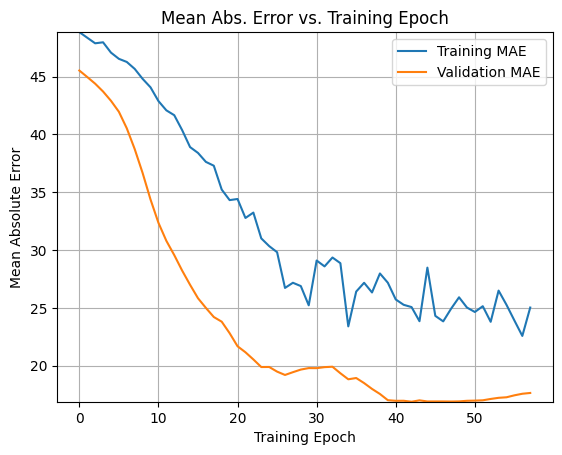

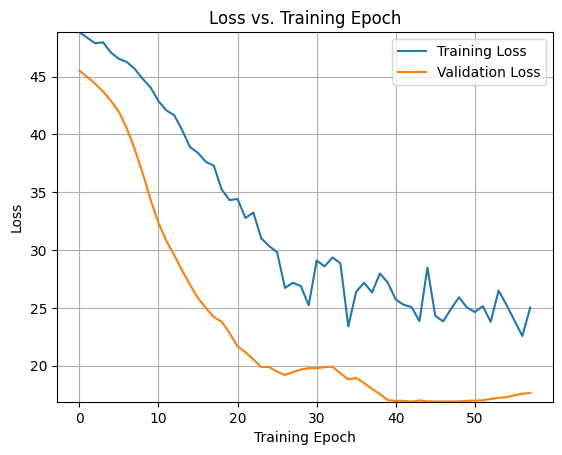

In [14]:
history_df = pd.DataFrame(history.history) #converts output into a dataframe

epoch_list= list(history_df.index)  #Extract the epoch to use as an x axis
MAE= list(history_df.loc[:, 'MAE'])  #and various y axes
MAE_val= list(history_df.loc[:, 'val_MAE'])
loss = list(history_df.loc[:, 'loss'])
val_loss = list(history_df.loc[:, 'val_loss'])

plt.figure()
plt.plot(epoch_list,MAE,label="Training MAE")
plt.plot(epoch_list,MAE_val,label="Validation MAE")
plt.title("Mean Abs. Error vs. Training Epoch")
plt.ylim(min((min(MAE),min(MAE_val))),max(max(MAE),max(MAE_val)))
plt.xlabel("Training Epoch")
plt.ylabel("Mean Absolute Error")
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.plot(epoch_list,loss,label="Training Loss")
plt.plot(epoch_list,val_loss,label="Validation Loss")
plt.title("Loss vs. Training Epoch")
plt.ylim(min((min(MAE),min(MAE_val))),max(max(MAE),max(MAE_val)))
plt.xlabel("Training Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

## Sample predictions for a couple songs

In [15]:
X_proc = preprocessor.transform(X) #Pre-process X using the preprocessor, so it is scaled in the way the neural network expects of an input
model_predictions_nested = model.predict(X_proc)
model_predictions = [model_predictions_nested[i][0] for i in range(0, len(model_predictions_nested))]
list_of_differences = [model_predictions[i]- y.iloc[i] for i in range(0,len(y))]

print("\n\nActual data:\n", y[0:10]) #True scores for those songs
print("Model predictions:\n", model_predictions[0:10]) #Use model to predict a couple songs
print("\n\n Differences:", list_of_differences[0:10])

print("Min of differences:", min(list_of_differences), "  Max of differences:", max(list_of_differences))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Actual data:
 track_name
Hold the Line                       56.50
Africa                              93.00
Fantasy                             46.75
Love Song                           10.50
Fantasy                             46.75
Them Changes (Chopnotslop Remix)    18.50
Fantasy                             46.75
Love Song                           10.50
Love Song                           10.50
Pamela                              47.50
Name: Yacht Score, dtype: float64
Model predictions:
 [np.float32(0.0), np.float32(60.893658), np.float32(7.7044926), np.float32(61.67833), np.float32(53.28071), np.float32(25.00047), np.float32(54.230816), np.float32(44.09606), np.float32(51.68015), np.float32(51.127598)]


 Differences: [np.float64(-56.5), np.float64(-32.10634231567383), np.float64(-39.04550743103027), np.float64(51.17832946777344), np.float64(6.530708312988281), np.float64(6.500469207763672), np.float64(7.480815887451172), np.float64(33.596

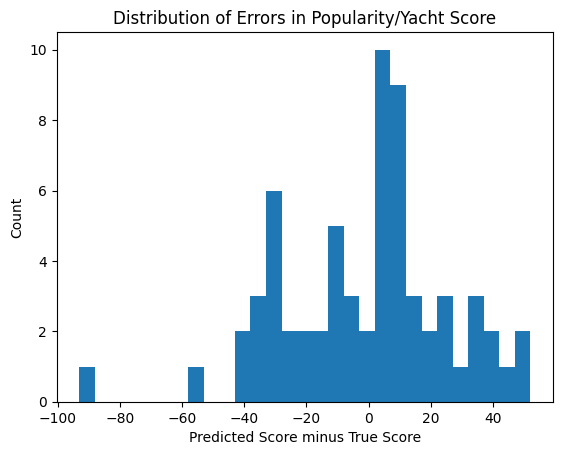

In [16]:
bin_width = 5
min_edge = min(list_of_differences)
max_edge = max(list_of_differences)
# Ensure the max edge covers the full range
bins = np.arange(min_edge, max_edge + bin_width, bin_width)

plt.figure()
plt.hist(list_of_differences, bins = bins)
plt.title("Distribution of Errors in Popularity/Yacht Score")
plt.ylabel("Count")
plt.xlabel("Predicted Score minus True Score")
plt.show()

## Conclusions
We see that the model performed surprisingly well given the limited number of features, with the mean absolute error on the validation data of only 17 points! Although this is by no means a perfect predictor (with differences as large as 93 points observed in comparisons of the predictions to the sample data), the performance intuitively feels quite reasonable.

The difference between the predicted score and true score is spread rather evenly, but unfortunately the sample size of 30 songs is far too small to get a clear-cut picture of how this model would extend to hundreds of other songs in the Yachtski table that were unfortunately not in the Spotify database.

Given the small sample size, one should be especially concerned about overfitting. Splitting the data into training and test splits, along with minibatching the data and having an early-stoppage callback should mitigate the impact of these effects, but the model would certainly benefit substantially from having more data to train on.